In [7]:
import numpy as np
import pandas as pd
from sklearn import svm
from os.path import join
from sklearn.svm import SVC
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import pickle

# 0. Load Data

In [2]:
data = pd.read_csv("./wholesale-customers.csv")

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
X = data.iloc[:, 2:]
y = data.iloc[:, 0]

# 1. Linear SVM

In [42]:
def linear_svm(value_range):
    results = []
    for C in value_range:
        kf = KFold(n_splits=5, random_state=0, shuffle=False)
        scores = []
        coeffs = []
        for train_index, test_index in kf.split(X):
            
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            clf = SVC(C=C, kernel='linear', gamma='auto')
            model = clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            coeff = clf.coef_
            
            scores.append(score)
            coeffs.append(coeff)
            
        print("C: [{}], Score: [{}]".format(C, np.mean(scores)))
        results.append([C, coeffs, scores])
    return results

In [ ]:
value_range = np.linspace(0.1, 10, 10)

In [ ]:
linear_results = linear_svm(value_range)
with open('linear_results.pickle', 'wb') as file:
    pickle.dump(linear_results, file)

In [23]:
with open('linear_results.pickle', 'rb') as file:
    linear_results = pickle.load(file)

In [29]:
data = []
columns = ["Penalty Parameter", "Score", 
           "Coeff[Fresh]", "Coeff[Milk]", "Coeff[Grocery]", 
           "Coeff[Frozen]", "Coeff[Detergents_Paper]", "Coeff[Delicassen]"]
for C, coeffs, scores in linear_results:
    line = []
    line.append(C)

    score = np.mean(scores)
    line.append(score)

    assert len(scores) == len(coeffs)
    max_index = scores.index(min(scores))
    coeff = coeffs[max_index]
    line.extend(*coeff.tolist())

    data.append(line)

linear_summary = pd.DataFrame(data, columns=columns)
linear_summary

,Penalty Parameter,Score,Coeff[Fresh],Coeff[Milk],Coeff[Grocery],Coeff[Frozen],Coeff[Detergents_Paper],Coeff[Delicassen]
0,0.1,0.877273,-0.000575,-0.000634,0.000670,-0.000871,0.002773,-0.000022
1,1.2,0.879545,-0.006264,-0.008178,0.007826,-0.007452,0.035589,0.005523
2,2.3,0.875000,-0.012072,-0.016173,0.015215,-0.013887,0.068210,0.011043
3,3.4,0.881818,-0.017869,-0.024182,0.022645,-0.020415,0.100694,0.016355
4,4.5,0.872727,-0.023319,-0.029614,0.042961,-0.033836,0.092252,-0.011410
5,5.6,0.877273,-0.032940,-0.051326,0.048654,-0.012300,0.151834,0.034814
6,6.7,0.875000,-0.035221,-0.048166,0.044881,-0.040161,0.198125,0.032222
7,7.8,0.881818,-0.041006,-0.056161,0.052294,-0.046743,0.230602,0.037511
8,8.9,0.877273,-0.056313,-0.078525,0.101842,-0.060034,0.178026,0.066965
9,10.0,0.875000,-0.051806,-0.065565,0.095255,-0.075380,0.204203,-0.025381


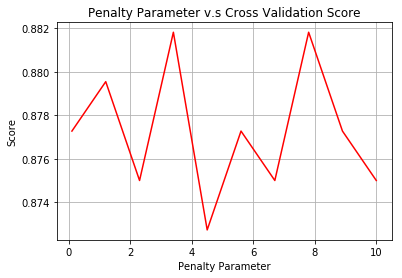

In [31]:
x = [C for C, coeffs, scores in linear_results]
y = [np.mean(scores) for C, coeffs, scores in linear_results]
plt.grid()
plt.plot(x, y, c='r')
plt.xlabel("Penalty Parameter")
plt.ylabel("Score")
plt.title("Penalty Parameter v.s Cross Validation Score")
plt.savefig("Linear_model.png")
plt.show()

# 2. Polynomial SVM

In [ ]:
def poly_svm(value_range):
    X = scale(data.iloc[:, 2:])
    X = pd.DataFrame(X)
    results = []
    for C in value_range:
        kf = KFold(n_splits=5, random_state=0, shuffle=False)
        scores = []
        coeffs = []
        for train_index, test_index in kf.split(pd.DataFrame(scale(X))):
            
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            clf = SVC(C=C, kernel='poly', gamma='auto')
            model = clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            coeff = clf.coef_
            
            scores.append(score)
            coeffs.append(coeff)
            
        print("C: [{}], Score: [{}]".format(C, np.mean(scores)))
        results.append([C, coeffs, scores])
    return results

In [ ]:
value_range = np.linspace(1, 50, 20)

In [ ]:
poly_results = poly_svm(value_range)
with open('poly_results.pickle', 'wb') as file:
    pickle.dump(poly_results, file)

In [19]:
with open('poly_results.pickle', 'rb') as file:
    poly_results = pickle.load(file)

In [20]:
data = []
columns = ["Penalty Parameter", "Score"]
for C, scores in poly_results:
    line = []
    line.append(C)

    score = np.mean(scores)
    line.append(score)

    data.append(line)

poly_summary = pd.DataFrame(data, columns=columns)
poly_summary

,Penalty Parameter,Score
0,1.000000,0.800000
1,3.578947,0.827273
2,6.157895,0.836364
3,8.736842,0.850000
4,11.315789,0.854545
5,13.894737,0.859091
6,16.473684,0.856818
7,19.052632,0.856818
8,21.631579,0.856818
9,24.210526,0.854545


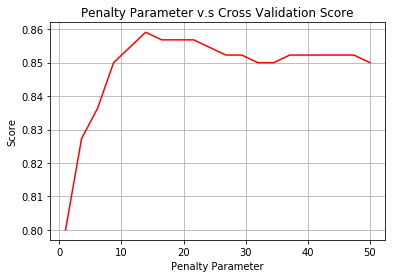

In [21]:
x = [C for C, scores in poly_results]
y = [np.mean(scores) for C, scores in poly_results]
plt.grid()
plt.plot(x, y, c='r')
plt.xlabel("Penalty Parameter")
plt.ylabel("Score")
plt.title("Penalty Parameter v.s Cross Validation Score")
plt.savefig("Poly_model.png")
plt.show()

# 3. Gaussion SVM

In [ ]:
def gaussion_svm(value_range):
    results = []
    for C in value_range:
        kf = KFold(n_splits=5, random_state=0, shuffle=False)
        scores = []
        coeffs = []
        for train_index, test_index in kf.split(X):
            
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            clf = SVC(C=C, kernel='rbf', gamma='auto')
            model = clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            coeff = clf.coef_
            
            scores.append(score)
            coeffs.append(coeff)
            
        print("C: [{}], Score: [{}]".format(C, np.mean(scores)))
        results.append([C, coeffs, scores])
    return results

In [ ]:
value_range = np.linspace(1, 100, 10)

In [ ]:
gaussion_results = gaussion_svm(value_range)

with open('gaussion_results.pickle', 'wb') as file:
    pickle.dump(gaussion_results, file)

In [14]:
with open('gaussion_results.pickle', 'rb') as file:
    gaussion_results = pickle.load(file)

In [17]:
data = []
columns = ["Penalty Parameter", "Score"]
for C, scores in gaussion_results:
    line = []
    line.append(C)

    score = np.mean(scores)
    line.append(score)

    data.append(line)

gaussion_summary = pd.DataFrame(data, columns=columns)
gaussion_summary

,Penalty Parameter,Score
0,1.0,0.884091
1,12.0,0.911364
2,23.0,0.918182
3,34.0,0.915909
4,45.0,0.909091
5,56.0,0.911364
6,67.0,0.911364
7,78.0,0.909091
8,89.0,0.904545
9,100.0,0.900000


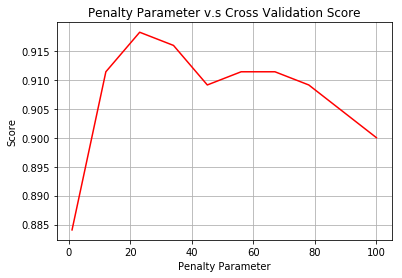

In [22]:
x = [C for C, scores in gaussion_results]
y = [np.mean(scores) for C, scores in gaussion_results]
plt.grid()
plt.plot(x, y, c='r')
plt.xlabel("Penalty Parameter")
plt.ylabel("Score")
plt.title("Penalty Parameter v.s Cross Validation Score")
plt.savefig("Gaussion_model.png")
plt.show()